In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# text processing

import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

def longest_word(s):
    return max(s.split(), key=len)

def get_last(s):
    return s.split()[-1]

In [3]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

In [4]:
crashes = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

In [5]:
# crashes.sample(5)

In [6]:
crashes["Date"] = pd.to_datetime(crashes["Date"])

In [7]:
# crashes['Time'] = crashes['Time'].str.replace('c: ', '')
# crashes['Time'] = crashes['Time'].str.replace('c:', '')
# crashes['Time'] = crashes['Time'].str.replace('c', '')
# crashes['Time'] = crashes['Time'].str.replace('12\'20', '12:20')
# crashes['Time'] = crashes['Time'].str.replace('18.40', '18:40')
# crashes['Time'] = crashes['Time'].str.replace('0943', '09:43')
# crashes['Time'] = crashes['Time'].str.replace('22\'08', '22:08')
# crashes['Time'] = crashes['Time'].str.replace('114:20', '00:00')

# crashes['Time'] = crashes['Time'].fillna('00:00')

In [8]:
100 * crashes.isna().sum()/len(crashes)

Date             0.000000
Time            42.122248
Location         0.379651
Operator         0.341686
Flight #        79.707669
Route           32.403189
Type             0.512528
Registration     6.359150
cn/In           23.310554
Aboard           0.417616
Fatalities       0.227790
Ground           0.417616
Summary          7.403189
dtype: float64

In [9]:
del crashes['Flight #']
del crashes['cn/In']
del crashes['Registration']
del crashes['Route']
del crashes['Time']

# Top deathly aircrafts and operators

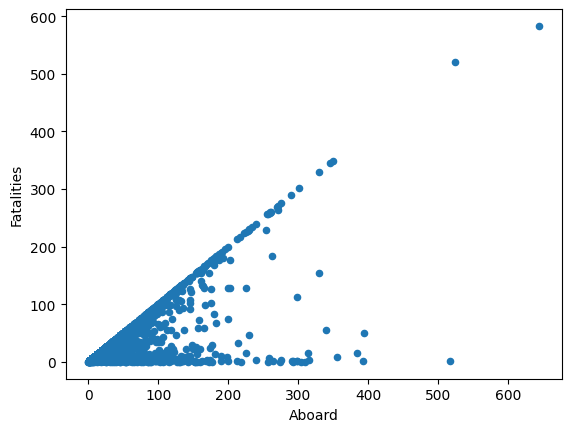

In [10]:
crashes.plot(x="Aboard", y="Fatalities", kind="scatter")
plt.show() 

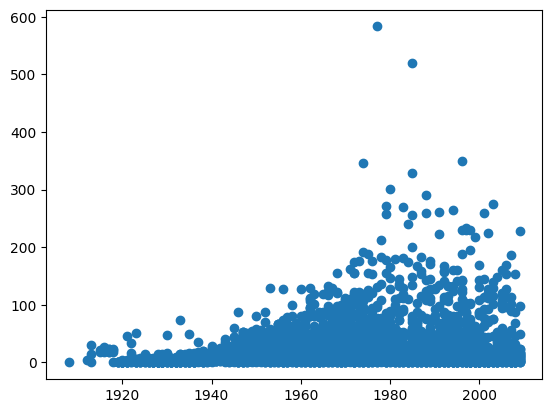

In [11]:
plt.scatter(crashes.Date.dt.year, crashes.Fatalities)
plt.show() 

In [12]:
crashes["Total Death"] = crashes["Fatalities"] + crashes["Ground"]

death_op = crashes.groupby('Operator')[['Total Death']].sum() 
death_op = death_op.sort_values(by='Total Death', ascending=False)

death_op.head(5)  # top 5

,Total Death
Operator,
Aeroflot,7184.0
American Airlines,4310.0
Military - U.S. Air Force,3866.0
United Air Lines,3770.0
Air France,1739.0


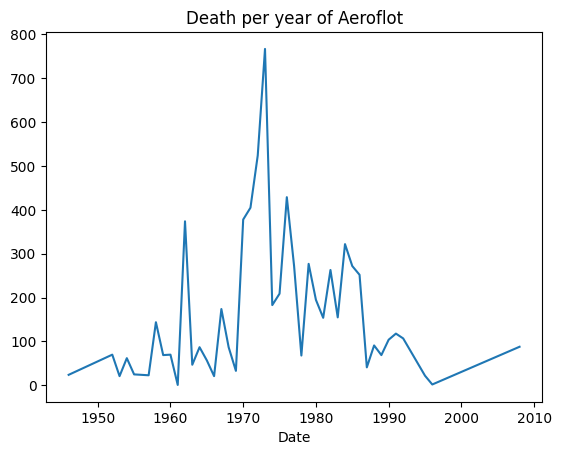

In [13]:
aeroflot = crashes.loc[crashes['Operator'] == 'Aeroflot'].drop(['Type', 'Ground', 'Total Death'], axis=1).copy()
aeroflot['Date'] = aeroflot['Date'].dt.year
aeroflot.groupby(['Date']).Fatalities.sum().plot()
plt.title('Death per year of Aeroflot')
plt.show()

In [14]:
crashes.Operator.value_counts()

Operator
Aeroflot                               179
Military - U.S. Air Force              176
Air France                              70
Deutsche Lufthansa                      65
Air Taxi                                44
                                      ... 
Military - Argentine Navy                1
Richland Flying Service - Air Taxii      1
Harbor Airlines - Air Taxi               1
Aerovias Venezolanas SA (Venezuela)      1
Strait Air                               1
Name: count, Length: 2476, dtype: int64

In [15]:
death_type = crashes.groupby('Type')[['Fatalities']].sum()
death_type.sort_values(by='Fatalities', ascending=False).head(10)  # top 10

,Fatalities
Type,
Douglas DC-3,4793.0
Antonov AN-26,1068.0
Douglas DC-6B,1055.0
Douglas C-47,1046.0
McDonnell Douglas DC-9-32,951.0
Douglas DC-4,930.0
Ilyushin IL-18B,852.0
Yakovlev YAK-40,834.0
Tupolev TU-134A,809.0


In [16]:
crashes.Type.value_counts()

Type
Douglas DC-3                                334
de Havilland Canada DHC-6 Twin Otter 300     81
Douglas C-47A                                74
Douglas C-47                                 62
Douglas DC-4                                 40
                                           ... 
Boeing 727-21                                 1
NAMC-YS-11-111                                1
Lockheed EC-121H                              1
Cessna 205A                                   1
Airbus A330-203                               1
Name: count, Length: 2446, dtype: int64

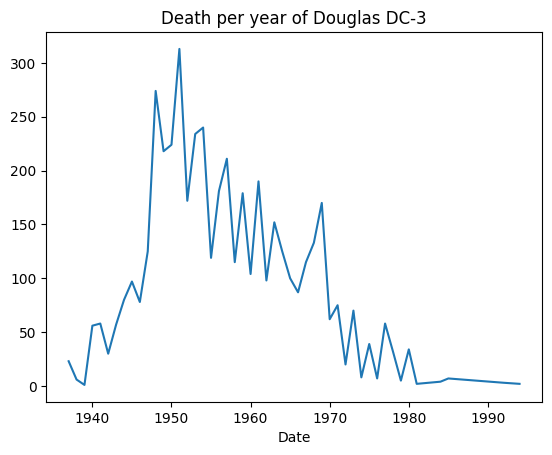

In [17]:
Douglas_DC_3 = crashes.loc[crashes['Type'] == 'Douglas DC-3'].drop(['Type', 'Ground', 'Total Death'], axis=1).copy()
Douglas_DC_3['Date'] = Douglas_DC_3['Date'].dt.year
Douglas_DC_3.groupby(['Date']).Fatalities.sum().plot()
plt.title('Death per year of Douglas DC-3')
plt.show()

In [18]:
# as per internet info there are about 150 Douglas DC-3 that still flying in 2023.
# as per graph we can see that now Douglas DC-3 is safer than before

# Cleaning the dataset

In [19]:
crashes.Ground.fillna(value=0, inplace=True) 
crashes.Aboard.fillna(crashes.Fatalities, inplace=True)

In [20]:
100 * crashes.isna().sum()/len(crashes)

Date           0.000000
Location       0.379651
Operator       0.341686
Type           0.512528
Aboard         0.227790
Fatalities     0.227790
Ground         0.000000
Summary        7.403189
Total Death    0.417616
dtype: float64

In [21]:
crashes.dropna(inplace=True)

In [22]:
crashes.shape

(4822, 9)

## Type column

In [23]:
crashes.Type = crashes.Type.apply(remove_numbers)
crashes.Type = crashes.Type.apply(remove_punctuation)
crashes.Type = crashes.Type.apply(longest_word)
crashes.Type = crashes.Type.str.lower()

In [24]:
crashes.Type.value_counts()

Type
douglas       914
boeing        324
lockheed      250
havilland     249
antonov       230
             ... 
hiller          1
brantly         1
piaggio         1
bac             1
bombardier      1
Name: count, Length: 334, dtype: int64

## Location column

In [25]:
crashes.Location = crashes.Location.apply(remove_numbers)
crashes.Location = crashes.Location.apply(remove_punctuation)
crashes.Location = crashes.Location.str.lower()
crashes.Location = crashes.Location.apply(get_last)

In [26]:
# print(sorted(crashes.Location.unique(), key=lambda x: x[0]))

In [27]:
replacements = {  # what am i doing with my life
    'ussr': 'russia',
    'russian': 'russia',
    'minnisota': 'minnesota',
    'islands': 'island',
    'atlantiocean': 'ocean',
    'pacifiocean': 'ocean',
    'atlantic': 'ocean',
    'baltisea': 'sea',
    'democratirepublicongo': 'congo',
    'democratirepublicogo': 'congo',
    'democtratirepublicongo': 'congo',
    'somalia': 'somali',
    'somaliland': 'somali',
    'massachusett': 'massachusetts',
    'massachutes': 'massachusetts',
    'alaksa': 'alaska',
    'alakska': 'alaska',
    'nwtcanada': 'canada',
    'quebecanada': 'canada',
    'indochina': 'vietnam',
    'washingon': 'washington',
    'inodnesia': 'indonesia',
    'indian': 'india',
    'airzona': 'arizona',
    'baangladesh': 'bangladesh',
    'aregntina': 'argentina',
    'jamacia': 'jamaica',
    'napal': 'nepal',
    'afghanstan': 'afghanistan',
    'dekota': 'dakota',
    'calilfornia': 'california',
    'cailifornia': 'california',
    'yugosalvia': 'yugoslavia',
    'thilandd': 'thailand',
    'besarthailand': 'thailand',
    'iloilophilippines': 'philippines',
    'philipines': 'philippines',
    'moscow': 'russia',
    'bulgeria': 'bulgaria',
    'oklohoma': 'oklahoma',
    'romainia': 'romania',
    'ilinois': 'illinois',
    'herzegovina': 'bosniaherzegovina',
    'coloado': 'colorado',
    'louisana': 'louisiana',
    'stromfjordgreenland': 'greenland',
    'labrador': 'canada',
    'arazona': 'arizona',
    'alalaskaska': 'alaska',
    'reunion': 'union',
    'tonkindiadia': 'india',
    'tonkindia': 'india',
    'dc': 'columbia',
    'ak': 'alaska',
    'ca': 'canada',
    'uk': 'kingdom',
    'ga': 'georgia',
    'nag': 'india',
    'in': 'india',
    'ny': 'york',
    'bo': 'bolivia',
    'hi': 'hawaii',
    'boliva': 'bolivia',
    'bugaria': 'bulgaria',
    'columbia': 'colombia',
    'cameroons': 'cameroon',
    'deleware': 'delaware',
    'djbouti': 'djibouti',
    'england': 'kingdom',
    'indies': 'indonesia',
    'malaya': 'malaysia',
    'mauritania': 'mauretania',
    'morroco': 'morocco',
    'morrocco': 'morocco',
    'phillipines': 'philippines',
    'rico': 'rica',
    'surinam': 'suriname',
    'wisconson': 'wisconsin'
}

crashes.Location = crashes.Location.replace(replacements)

## Operator column

In [28]:
crashes.Operator.str.contains('Military').sum()

722

In [36]:
# crashes.Operator.value_counts()[:50]

In [37]:
(crashes.Operator.value_counts() < 10).sum()

2298

In [38]:
# nothing can be made here

## Reviewing the summary column

In [365]:
# pd.set_option('max_colwidth', 100)

In [ ]:
crashes.Summary = crashes.Summary.str.lower()

In [ ]:
crashes['Summary'] = crashes['Summary'].apply(remove_numbers)
crashes['Summary'] = crashes['Summary'].apply(remove_stopwords)
crashes['Summary'] = crashes['Summary'].apply(remove_punctuation)
crashes['Summary'] = crashes['Summary'].apply(lemmatize_words)

In [ ]:
pd.Series(' '.join(crashes["Summary"]).split()).value_counts()[:900]

In [ ]:
# word clustering problem - synonyms are considered different words

In [ ]:
from gensim.models.keyedvectors import KeyedVectors

path = 'GoogleNews-vectors-negative300.bin.gz'
model = KeyedVectors.load_word2vec_format(path, binary=True)

In [ ]:
model.similarity('aircraft', 'plane')

In [ ]:
# model.get_vector('flight')
# model['flight']

In [ ]:
# find a vector for each word in a sentence, average them

In [ ]:
# crashes.loc[crashes.Summary.str.contains(' shot ') == True]

In [ ]:
# crashes.Summary.str.contains('military').value_counts()
# crashes.Summary.str.contains('shot').value_counts()
# crashes.Summary.str.contains('disappeared').value_counts()
# crashes.Summary.str.contains('destroyed').value_counts()